### Importing Necessary libraries


In [62]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *

### Taking a Look at the Data

In [58]:
df = pd.read_csv('mock_fashion_data_uk_us.csv')
df

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,T5D3,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Y0V7,52.341277,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other
2,N9Q4,15.430975,Jigsaw,Footwear,Very Bad,3.967106,197,Streetwear,"S, M, L",M,Blue,Average,27,Marie Claire,Gigi Hadid,Summer,Nighttime,Unknown,Negative,Neutral
3,V2T6,81.116542,Alexander McQueen,Outerwear,Not Good,2.844659,473,Formal,"S, M, L",L,Red,Very High,50,Marie Claire,Chiara Ferragni,Fall/Winter,Weekend,Neutral,Other,Other
4,S7Y1,31.633686,Tommy Hilfiger,Bottoms,Very Good,1.183242,55,Sporty,"M, L, XL",S,Green,Above Average,23,Glamour,Song of Style,Spring,Daytime,Positive,Mixed,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,K9C7,16.255998,Mulberry,Accessories,Best,3.534252,312,Vintage,"S, L, XL",XL,Green,Very High,37,Cosmopolitan,Olivia Palermo,Winter,Holiday,Positive,Negative,Positive
999996,E5I5,78.555545,Mulberry,Activewear,Best,1.896160,68,Casual,"S, M, L",L,Red,Average,52,Glamour,Kendall Jenner,Spring,Evening,Unknown,Other,Neutral
999997,Y0C9,34.379639,Mulberry,Tops,Not Good,3.168064,237,Casual,"S, M, L",M,Red,High,25,Cosmopolitan,Leandra Medine,Summer,Evening,Neutral,Mixed,Unknown
999998,B1D8,62.343618,Ralph Lauren,Tops,Best,4.764673,53,Sporty,"M, L, XL",S,Red,Above Average,29,W,Olivia Palermo,Spring/Summer,Evening,Positive,Other,Other


In [ ]:
#checking for null values
df.isnull().sum()

Product Name                    0
Price                           0
Brand                           0
Category                        0
Description                     0
Rating                          0
Review Count                    0
Style Attributes                0
Total Sizes                     0
Available Sizes                 0
Color                           0
Purchase History                0
Age                             0
Fashion Magazines               0
Fashion Influencers             0
Season                          0
Time Period Highest Purchase    0
Customer Reviews                0
Social Media Comments           0
feedback                        0
dtype: int64

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Encode categorical columns
X = df[['Price', 'Review Count']]
X_encoded = pd.get_dummies(X, drop_first=True)  # Converts text to numeric dummy columns

y = df['Rating']  # Continuous target variable

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
validation_score = model.score(X_val, y_val)
test_score = model.score(X_test, y_test)
print('Validation R^2:', validation_score)
print('Test R^2:', test_score)

# Predict new data
new_row_values = {
    'Price': 70.0,
    'Review Count': 150,
}
new_row_df = pd.DataFrame([new_row_values])
new_row_encoded = pd.get_dummies(new_row_df)

# Match training columns
new_row_encoded = new_row_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Predict
prediction = model.predict(new_row_encoded)
print('Predicted Rating:', prediction)

# Validation errors
val_pred = model.predict(X_val)
print('Mean Squared Error (validation):', mean_squared_error(y_val, val_pred))
print('Mean Absolute Error (validation):', mean_absolute_error(y_val, val_pred))


Validation R^2: -3.091250843079152e-06
Test R^2: -0.0002906215871250062
Predicted Rating: [3.00138285]
Mean Squared Error (validation): 1.3326708671647058
Mean Absolute Error (validation): 0.9995094586439148


### Applying the RandomForestRegressor

In [64]:
# Select and Encode Features
X = df[['Price', 'Brand', 'Category', 'Review Count', 'Purchase History',
        'Fashion Influencers', 'Fashion Magazines', 'Season', 'Social Media Comments']]

y = df['Rating']

# Encode *before* splitting to ensure all splits have same dummy columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the Data
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the Model
model = RandomForestRegressor(
    n_estimators=50,   # fewer trees for speed
    max_depth=10,      # prevent overfitting
    n_jobs=-1,         # use all CPU cores
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate model performance
validation_score = model.score(X_val, y_val)
test_score = model.score(X_test, y_test)

print('Validation R²:', validation_score)
print('Test R²:', test_score)

# Predict on new data
new_row_values = {
    'Price': 70.0,
    'Brand': 'Zara',
    'Category': 'Tops',
    'Review Count': 150,
    'Purchase History': 'Medium',
    'Fashion Influencers': 5,
    'Fashion Magazines': 3,
    'Season': 'Spring',
    'Social Media Comments': 25
}

new_row_df = pd.DataFrame([new_row_values])
new_row_encoded = pd.get_dummies(new_row_df)

# Reindex to match training columns
new_row_encoded = new_row_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Predict
prediction = model.predict(new_row_encoded)
print('Predicted Rating:', prediction)

#Validation error metrics
val_pred = model.predict(X_val)
print('Mean Squared Error (validation):', mean_squared_error(y_val, val_pred))
print('Mean Absolute Error (validation):', mean_absolute_error(y_val, val_pred))



Validation R²: -0.0002814116862746019
Test R²: -0.00022044921255903738
Predicted Rating: [3.00268017]
Mean Squared Error (validation): 1.3421442875580085
Mean Absolute Error (validation): 1.004766729218804


### Taking a Look at why the Performance is so Poor

count    1000000.000000
mean           2.998454
std            1.154696
min            1.000000
25%            1.998608
50%            2.996328
75%            3.998479
max            4.999999
Name: Rating, dtype: float64

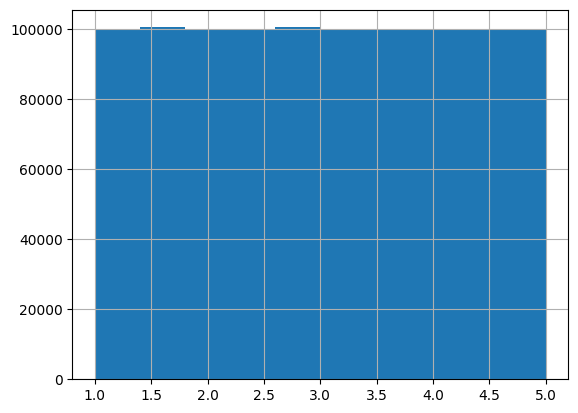

In [ ]:
#looking at the column 'Rating' distribution

df['Rating'].hist(bins=10)
df['Rating'].describe()

In [ ]:
#looking at the importance of the selected features for predicting the rating

importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)
importances.sort_values(ascending=False).head(10)

Price                                 0.319073
Review Count                          0.185849
Season_Fall/Winter                    0.012920
Season_Spring                         0.011668
Season_Summer                         0.011339
Social Media Comments_Positive        0.011321
Season_Spring/Summer                  0.010988
Social Media Comments_Neutral         0.010583
Fashion Influencers_Kendall Jenner    0.010394
Season_Winter                         0.010385
dtype: float64

### Applying the RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Example: binary target (high rating >= 3.5)
y_binary = (df['Rating'] >= 3.5).astype(int)

# Feature selection (use your relevant features)
X = df[['Price', 'Brand', 'Category', 'Review Count', 'Purchase History',
        'Fashion Influencers', 'Fashion Magazines', 'Season', 'Social Media Comments']]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y_binary, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

rf_classifier = RandomForestClassifier(
    n_estimators=100,         # start with 100 trees
    max_depth=10,             # limit depth to prevent overfitting
    class_weight='balanced',  # handle class imbalance
    random_state=42,
    n_jobs=-1                 # use all CPU cores
)

rf_classifier.fit(X_train, y_train)

# Validation
val_pred = rf_classifier.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_pred))
print("Validation Classification Report:\n", classification_report(y_val, val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, val_pred))

# Test
test_pred = rf_classifier.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_pred))
print("Test Classification Report:\n", classification_report(y_test, test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, test_pred))

new_row_values = {
    'Price': 70.0,
    'Brand': 'Zara',
    'Category': 'Tops',
    'Review Count': 150,
    'Purchase History': 'Medium',
    'Fashion Influencers': 5,
    'Fashion Magazines': 3,
    'Season': 'Spring',
    'Social Media Comments': 25
}

new_row_df = pd.DataFrame([new_row_values])
new_row_encoded = pd.get_dummies(new_row_df)
new_row_encoded = new_row_encoded.reindex(columns=X_encoded.columns, fill_value=0)

prediction = rf_classifier.predict(new_row_encoded)
print("Predicted Class (high rating >= 3.5):", prediction)


Validation Accuracy: 0.50531
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.52      0.57     62270
           1       0.38      0.48      0.42     37730

    accuracy                           0.51    100000
   macro avg       0.50      0.50      0.49    100000
weighted avg       0.53      0.51      0.51    100000

Validation Confusion Matrix:
 [[32604 29666]
 [19803 17927]]
Test Accuracy: 0.50911
Test Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.52      0.57     62516
           1       0.38      0.48      0.42     37484

    accuracy                           0.51    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       0.53      0.51      0.52    100000

Test Confusion Matrix:
 [[32819 29697]
 [19392 18092]]
Predicted Class (high rating >= 3.5): [0]


### Visualization 1

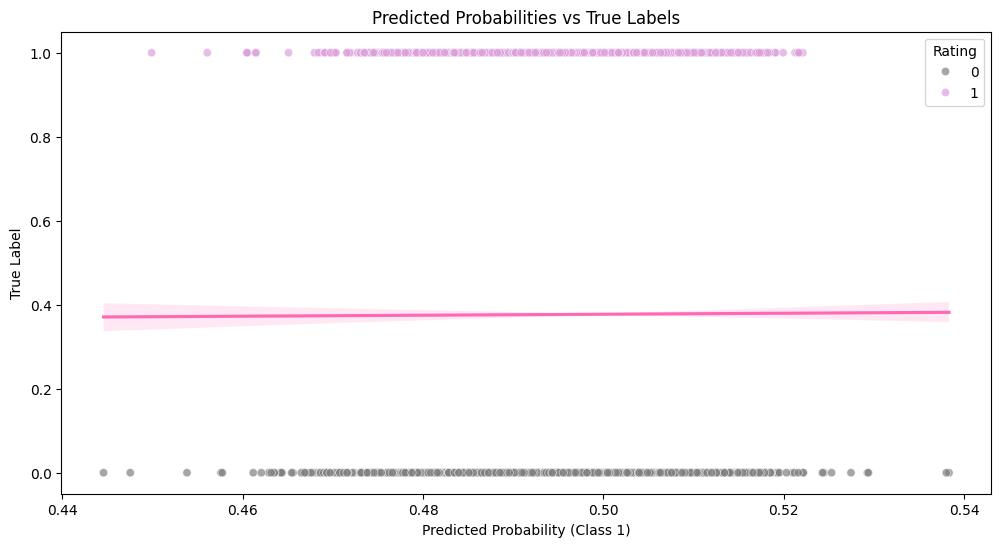

In [ ]:
# Get predicted probabilities for class 1
val_pred_proba = rf_classifier.predict_proba(X_val)[:, 1]

plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(
    x=val_pred_proba,
    y=y_val,
    hue=y_val, 
    palette={0: 'gray', 1: 'plum'},  # 0 = gray, 1 = laveplumnder
    alpha=0.7
)
plt.title('Predicted Probabilities vs True Labels')

# Optional: Add regression line
sns.regplot(x=val_pred_proba, y=y_val, scatter=False, color='hotpink')
plt.xlabel('Predicted Probability (Class 1)')
plt.ylabel('True Label')
plt.show()


### Visualization 2

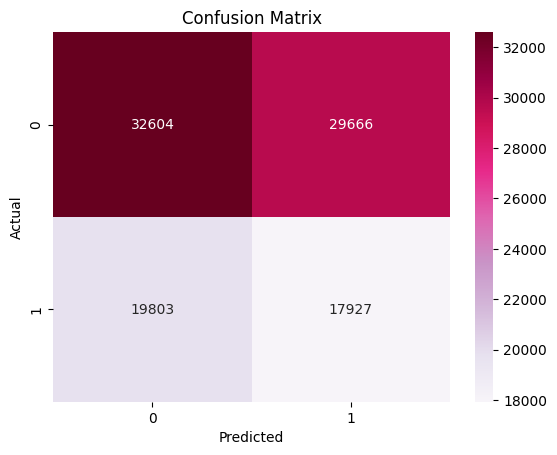

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Visualization 3

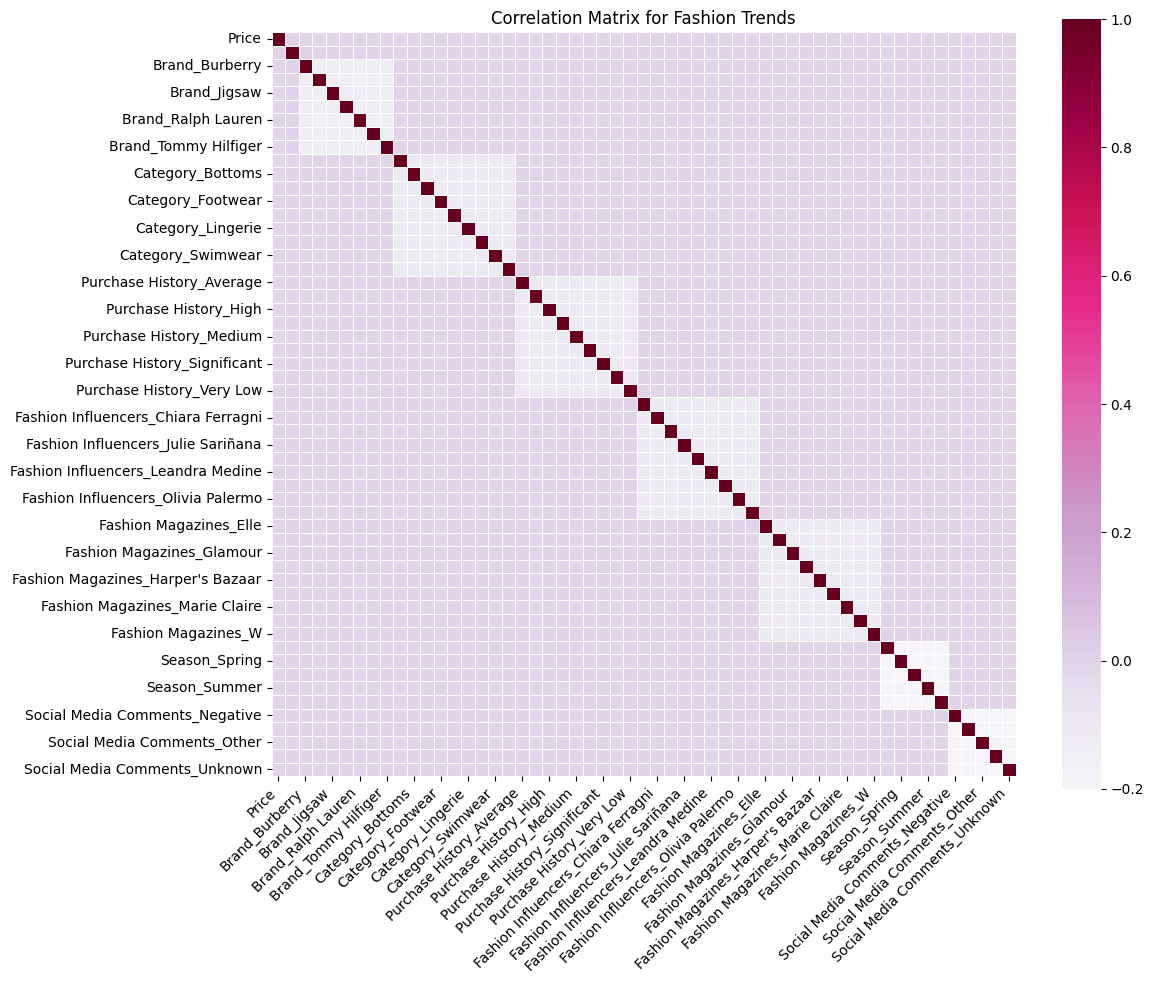

In [ ]:
# Encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Compute correlation matrix on encoded features
cor_numVar = X_encoded.corr(method='pearson')

# Plot
plt.figure(figsize=(12, 10))
corrplot = sns.heatmap(
    cor_numVar, 
    annot=False,       # True makes it very crowded for many columns
    cmap='PuRd', 
    square=True, 
    linewidths=0.5, 
    linecolor='white'
)
corrplot.set_xticklabels(corrplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation Matrix for Fashion Trends')
plt.show()
